/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 1 completed with reward: 27.0
Episode 2 completed with reward: 15.0
Episode 3 completed with reward: 53.0
Episode 4 completed with reward: 20.0
Episode 5 completed with reward: 19.0
Episode 6 completed with reward: 18.0
Episode 7 completed with reward: 17.0
Episode 8 completed with reward: 22.0
Episode 9 completed with reward: 44.0
Episode 10 completed with reward: 24.0
Episode 11 completed with reward: 16.0
Episode 12 completed with reward: 12.0
Episode 13 completed with reward: 14.0
Episode 14 completed with reward: 13.0
Episode 15 completed with reward: 27.0
Episode 16 completed with reward: 35.0
Episode 17 completed with reward: 35.0
Episode 18 completed with reward: 39.0
Episode 19 completed with reward: 33.0
Episode 20 completed with reward: 24.0
Episode 21 completed with reward: 36.0
Episode 22 completed with reward: 30.0
Episode 23 completed with reward: 33.0
Episode 24 completed with reward: 20.0
Episode 25 completed with reward: 38.0
Episode 26 completed with reward: 

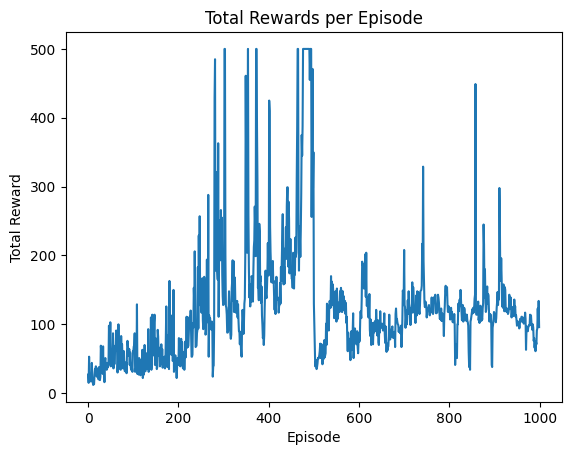

In [2]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.linear1 = nn.Linear(state_dim, 128)
        self.linear2 = nn.Linear(128, action_dim)
    def forward(self, state):
        x = torch.relu(self.linear1(state))
        probabilities = torch.softmax(self.linear2(x), dim=-1)
        return probabilities

class Critic(nn.Module):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.linear1 = nn.Linear(state_dim, 128)
        self.linear2 = nn.Linear(128, 1)
    def forward(self, state):
        x = torch.relu(self.linear1(state))
        value = self.linear2(x)
        return value

def main():
    env = gym.make('CartPole-v1')
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n
    actor = Actor(state_dim, action_dim)
    critic = Critic(state_dim)
    actor_optimizer = optim.Adam(actor.parameters(), lr=0.001)
    critic_optimizer = optim.Adam(critic.parameters(), lr=0.001)

    total_rewards = []

    num_episodes = 1000
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            state = torch.FloatTensor(state).unsqueeze(0)
            probs = actor(state)
            dist = torch.distributions.Categorical(probs)
            action = dist.sample()

            next_state, reward, done, _ = env.step(action.item())
            total_reward += reward
            state_value = critic(state)
            next_state_value = critic(torch.FloatTensor(next_state).unsqueeze(0))
            target_value = reward + 0.99 * next_state_value * (1 - int(done))
            delta = target_value - state_value

            actor_loss = -dist.log_prob(action) * delta.detach()
            critic_loss = delta ** 2

            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()

            critic_optimizer.zero_grad()
            critic_loss.backward()
            critic_optimizer.step()

            state = next_state
        total_rewards.append(total_reward)
        print(f'Episode {episode+1} completed with reward: {total_reward}')

    plt.plot(total_rewards)
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

if __name__ == '__main__':
    main()